# USA FLIGHTS ANALYSIS 2000-2005
### by Sreyash Mudiam Venkata

# Introduction
- For this research project, I have chosen to work with a dataset that contains information related to domestic flight routes within the United States from 2000 to 2005. 
- I picked this dataset as anything related to flights and its operations is of huge interest to me as I am a former Aerospace Engineer. 
- The dataset includes details such as the origin and destination of flights, the number of passengers, available seats, flight frequencies, distances, flight dates, and population figures of the origin and destination cities. 
- This research might be able to provide valuable insights into an important aspect of the aviation industry and contribute to a better understanding of factors affecting seat occupancy, distance, frequency of domestic flights.

# Research Question
- The primary research question that I have chosen in this project is to understand the factors influencing seat occupancy rates, busiest flight routes based on cities and states for the domestic flights within the United States. To explore the relationship between various attributes, such as distance, flight frequency, and passenger numbers, to gain insights into the determinants of seat occupancy in these flights.
- Through a combination of exploratory data analysis and inference, I will uncover key findings that shed light on the dynamics of seat occupancy in domestic flights. My analysis includes the use of both Matplotlib and Seaborn for visualizations, ensuring a comprehensive exploration and valid conclusions from the dataset.

# Data Summary

- The dataset consists of records for numerous domestic flight routes within the United States from year 2000 to 2005 from which various number of use cases can be derived as shown further.

- Attributes for each use case includes:

  - Origin: The departure airport code.
  - Origin City: The departure city with State Code.
  - Destination: The arrival airport code.
  - Destination City: The arrival city with State Code.
  - Passengers: The number of passengers on the flight.
  - Seats: The number of available seats on the flight.
  - Flights: The number of flights for that specific route.
  - Distance: The distance of the flight route in miles.
  - Fly Date: The date of the flight in yyyymm format.
  - Origin Population: The population of the origin city.
  - Destination Population: The population of the destination city.

# Data Wrangling
- For deriving better conclusions and good understanding, it is better to split Origin City, Destination City and Fly Date(yyyymm) to Origin_City and Origin_State, Destination_City and Destination_State, Year(yyyy) and Month(mm) respectively.
- This can be achieved by:
    - Splitting the 'Origin City' and 'Destination City' columns into 'Origin_City' and 'Origin_State' columns and 'Destination_City' and 'Destination_State' columns
    - Drop the original 'Origin City' and 'Destination City' columns.
    - Convert the 'Fly Date' column to a string.
    - Extract year and month using string slicing.
    - Convert the new columns to integers.
    - drop the 'Fly Date' column 

In [39]:
from flight_analysis.DataProcessing import DataProcessing

data_processor = DataProcessing('https://raw.githubusercontent.com/sreyashvenkata/USA_flights_analysis/main/data/subset_data_2000_2005.csv')

data_processor.data_wrangling()

        Origin Destination     Origin City            Destination City  \
0          SEA         RDM     Seattle, WA                    Bend, OR   
1          SEA         RDM     Seattle, WA                    Bend, OR   
2          SEA         RDM     Seattle, WA                    Bend, OR   
3          SEA         RDM     Seattle, WA                    Bend, OR   
4          SEA         RDM     Seattle, WA                    Bend, OR   
...        ...         ...             ...                         ...   
1214515    STL         TBN   St. Louis, MO       Fort Leonard Wood, MO   
1214516    STL         TBN   St. Louis, MO       Fort Leonard Wood, MO   
1214517    STL         TBN   St. Louis, MO       Fort Leonard Wood, MO   
1214518    STL         TBN   St. Louis, MO       Fort Leonard Wood, MO   
1214519    FWA         OH1  Fort Wayne, IN  Washington Court House, OH   

         Passengers  Seats  Flights  Distance  Fly Date  Origin Population  \
0              2023   4144      1

# Desired Columns Order
- Arranging the columns in a desired order is necessary for using and reading it efficiently. All the origin details are moved to front followed by destination details and then remaining numeric columns. This can be achieved by:
    - Defining the desired column order
    - Reordering the DataFrame columns

In [40]:
data_processor.desired_order()

  Origin Origin_City Origin_State Destination Destination_City  \
0    SEA     Seattle           WA         RDM             Bend   
1    SEA     Seattle           WA         RDM             Bend   
2    SEA     Seattle           WA         RDM             Bend   
3    SEA     Seattle           WA         RDM             Bend   
4    SEA     Seattle           WA         RDM             Bend   

  Destination_State  Year  Month  Passengers  Seats  Flights  Distance  \
0                OR  2000      1        2023   4144      112     228.0   
1                OR  2000     12        2995   4699      127     228.0   
2                OR  2000      9        3134   5328      144     228.0   
3                OR  2000      6        3420   5328      144     228.0   
4                OR  2000     10        3108   5106      138     228.0   

   Origin Population  Destination Population  
0            6104758                  116618  
1            6104758                  116618  
2            6104

# Data Shape and Type
- Let's get the number of rows and columns in the dataset and then list the column names and their data types to know about the data shape and data types 
- Typically
    - Origin and Destination are stored as strings (object data type).
    - Passengers, Seats, Flights, and Distance are usually stored as integers or floating-point numbers.
    - Fly Date may be stored as a date or datetime data type, here we converted them into int64.
    - Origin Population and Destination Population are also stored as integers or floating-point numbers.


In [17]:
data_processor.shape()

Number of Rows: 1214520
Number of Columns: 14
Column Data Types:
Origin                     object
Origin_City                object
Origin_State               object
Destination                object
Destination_City           object
Destination_State          object
Year                        int64
Month                       int64
Passengers                  int64
Seats                       int64
Flights                     int64
Distance                  float64
Origin Population           int64
Destination Population      int64
dtype: object


# Exploratory Data Analysis (EDA)
- It is a critical step in the data analysis process as it involves investigating, summarizing, and visualizing the main characteristics of a dataset to better understand its structure, detect patterns, identify anomalies, and extract insights.
- Summary Statistics: Let's calculate and examine basic statistics for each attribute to understand the central tendency, dispersion, and other key properties of the data. It commonly include mean, median, standard deviation, minimum, maximum, and quartiles, it can be derived easily by using describe function as follows.
- Let us set the float format for display instead of scientific notation.

In [18]:
data_processor.summary()

           Year     Month  Passengers     Seats   Flights  Distance  \
count 1214520.0 1214520.0   1214520.0 1214520.0 1214520.0 1214520.0   
mean     2002.7       6.6      2585.9    3775.9      37.2     719.1   
std         1.7       3.5      4340.5    6017.8      50.1     619.1   
min      2000.0       1.0         0.0       0.0       0.0       0.0   
25%      2001.0       4.0        72.0     128.0       2.0     282.0   
50%      2003.0       7.0       831.0    1430.0      23.0     542.0   
75%      2004.0      10.0      3368.0    4930.0      56.0     944.0   
max      2005.0      12.0     78291.0  112385.0    1036.0    5095.0   

       Origin Population  Destination Population  
count          1214520.0               1214520.0  
mean           5817773.0               5833706.3  
std            7844286.8               7870106.3  
min              13050.0                 12887.0  
25%            1016377.0               1001874.0  
50%            2144528.0               2144528.0  
75%

- Let's identify unique values in the categorical columns which are non-numeric.

In [19]:
data_processor.unique_values()

Unique values in 'Origin': ['SEA' 'PDX' 'MFR' 'FLL' 'SFO' 'PHX' 'BFI' 'GGG' 'GTF' 'LMT' 'FAT' 'EKO'
 'TUS' 'SMF' 'MWH' 'LWS' 'BIL' 'DFW' 'RBG' 'SLC' 'GEG' 'EUG' 'FCA' 'GRB'
 'RFD' 'SJC' 'CMI' 'CLE' 'ABI' 'YKM' 'HOU' 'IAH' 'ORD' 'ELP' 'ABQ' 'BMI'
 'GCK' 'SBN' 'GFK' 'MCI' 'SGF' 'SPI' 'MSP' 'SAT' 'CID' 'GRI' 'IND' 'CRP'
 'CLM' 'GJT' 'OKC' 'SPS' 'SBA' 'RKS' 'COS' 'ICT' 'AMA' 'CYS' 'MSO' 'MSN'
 'LBL' 'CPR' 'LRD' 'DAY' 'OMA' 'GYY' 'ACT' 'BTM' 'AUS' 'CAK' 'FAR' 'MOT'
 'TUL' 'FOE' 'CWA' 'PIA' 'MKE' 'BNA' 'LAS' 'STL' 'FSM' 'BLI' 'DSM' 'EAU'
 'EVV' 'RAP' 'LIT' 'TWF' 'SCK' 'PUB' 'DLH' 'LNK' 'JAC' 'LBB' 'MAF' 'BPT'
 'BIS' 'ALO' 'LSE' 'FWA' 'CVG' 'FOD' 'PIH' 'FSD' 'DEC' 'DBQ' 'RNO' 'SLN'
 'UIN' 'HLN' 'LAW' 'RDM' 'TOL' 'SAN' 'RDD' 'OAK' 'RIW' 'DTW' 'BRO' 'SJT'
 'PRB' 'PUW' 'MTJ' 'AZO' 'SHR' 'BZN' 'MCE' 'LBF' 'GRK' 'VGT' 'LAX' 'BFF'
 'BFL' 'PNC' 'HRO' 'WDG' 'RCA' 'BWD' 'PHL' 'IAD' 'MSY' 'MEM' 'BGM' 'PIT'
 'PVD' 'ROC' 'YIP' 'ALB' 'ITH' 'BOS' 'ELM' 'EWR' 'ABE' 'LGA' 'SYR' 'AVP'
 'ROA' 'RDU' 'MDT' 'GSP'

# Inference
- Various analysis were performed in the next stages to derive better conclusions from the datas.

## Passenger Trends
- 'Year' column in x-axis and 'Passengers' column in y-axis
- Let's set the x-axis ticks to show integers from 2000 to 2005 with a step of 1
- Let's format y-axis labels in millions

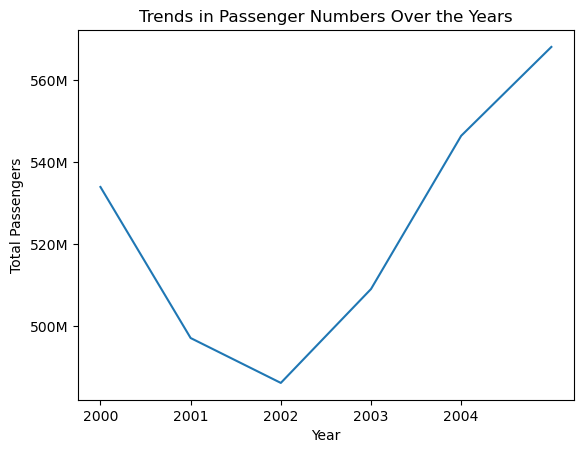

In [20]:
from flight_analysis.Visualization import Visualization  # Assuming your Visualization class is in a separate file

visualizer = Visualization()

# Set the DataFrame using the set_data method
visualizer.set_data(data_processor)

# Call the passenger_trends method on the instance
visualizer.passenger_trends()

- For the Seaborn, let's adjust the figure size as 10X6 for clear picture.
- ***Based on the graphs shown above and below, we can cleary see that there is a drastic drop in flight passengers from 2000 to 2002. The main reason for this could be the 9/11 attact that has occured in the year 2001 which affected US commercial airways to a great extent.***

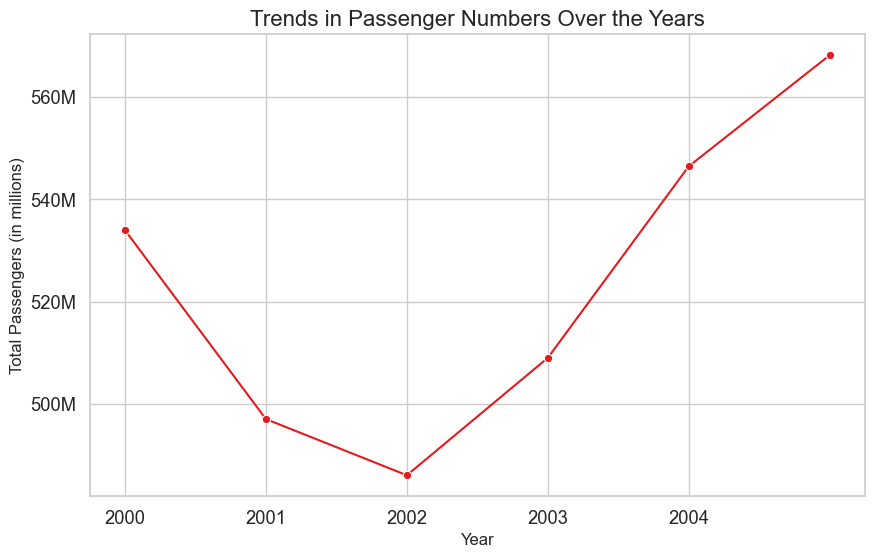

In [21]:
visualizer.passenger_trends_seaborn()

- Let's plot this monthly passengers trend in different line colours during each and every year in the dataset by using subplots and for loop. As shown below, we can clearly see that the mean monthly passengers has given us the nearest result for the conclusions that were derived earlier. 

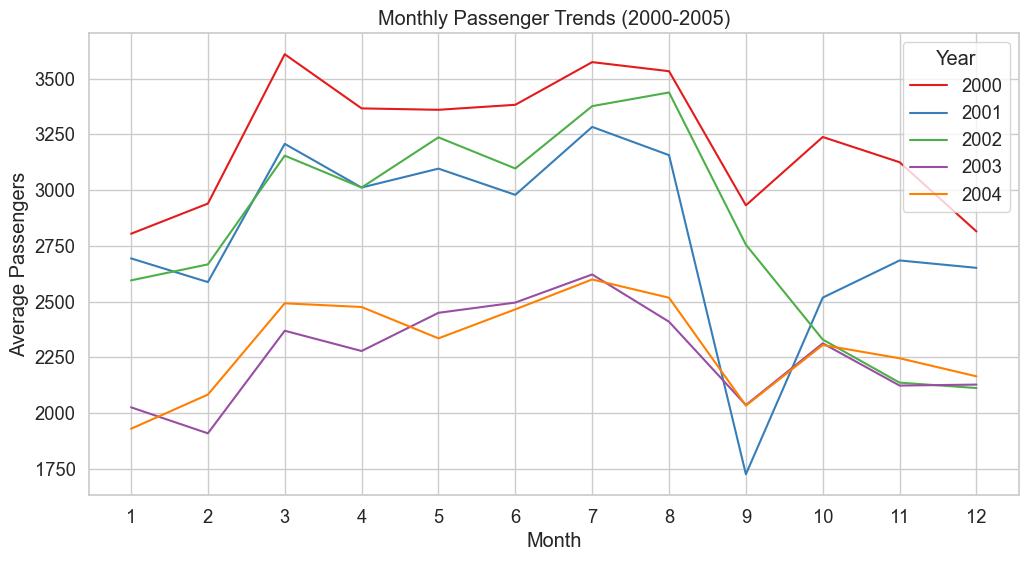

In [22]:
visualizer.monthly_passengers_plot()

- As shown below, we can clearly see that it is more clear in the seaborn plot as it easy to read the data and arrive at decisions.

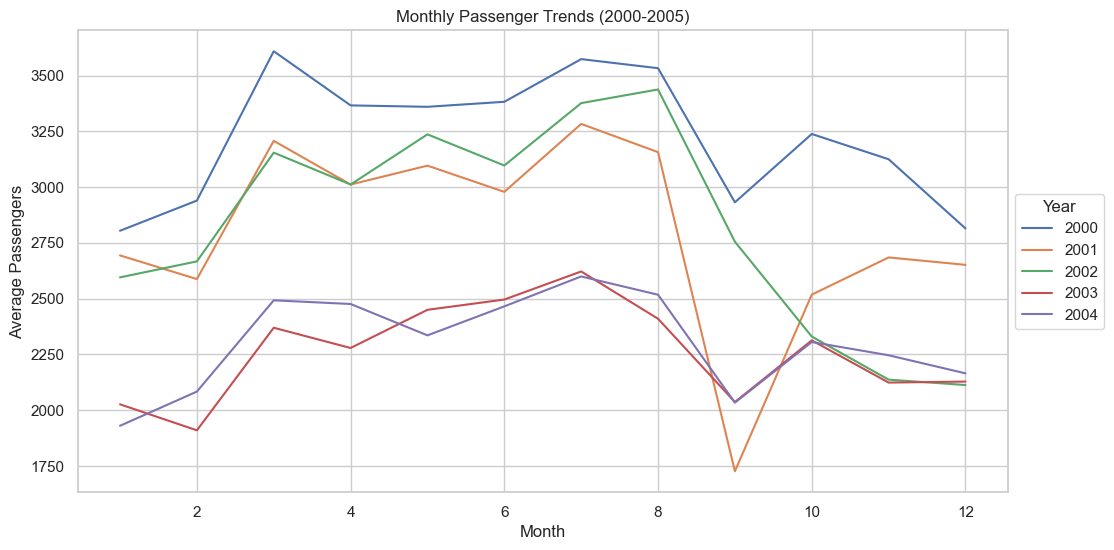

In [23]:
visualizer.monthly_passengers_seaborn()

- Let's find out which route in the Unites States has more demand by counting the number of flights in a particular route. 
- As shown below, we can clearly conclude that the busiest route is from LAS to LAX and Hawai HNL

In [10]:
from flight_analysis.Analysis import Analysis  # Assuming your Visualization class is in a separate file

Analyzer = Analysis()

# Set the DataFrame using the set_data method
Analyzer.set_data(data_processor)

# Call the passenger_trends method on the instance
Analyzer.top_routes()

Route
LAS to LAX    8688326
OGG to HNL    8564898
LAX to LAS    8440200
ATL to MCO    8065167
HNL to OGG    8054332
               ...   
GRR to AVL          0
GRR to BFF          0
GRR to BHM          0
GRR to BIS          0
ZZV to YIP          0
Name: Passengers, Length: 26106, dtype: int64


In [11]:
Analyzer.top_city_routes()

City_Route
Houston to Dallas                10276516
Dallas to Houston                10259865
Los Angeles to Chicago            9462360
Chicago to Los Angeles            9323452
Las Vegas to Los Angeles          8688326
                                   ...   
San Antonio to Salina                   0
Indianapolis to Athens                  0
Indianapolis to Binghamton              0
Indianapolis to Bowling Green           0
Zanesville to Shreveport                0
Name: Passengers, Length: 20925, dtype: int64


In [12]:
Analyzer.top_state_routes()

State_Route
TX to TX    96314194
CA to CA    82220063
GA to FL    37991702
FL to GA    37663341
TX to CA    29284581
              ...   
AK to SC           0
NM to DE           0
VA to MS           0
VA to ND           0
VT to LA           0
Name: Passengers, Length: 2278, dtype: int64


In [13]:
Analyzer.monthly_passengers()

Month
7    2975.6
8    2866.2
3    2838.8
5    2811.7
6    2797.5
4    2735.5
10   2485.9
11   2407.3
2    2322.4
12   2317.1
1    2272.7
9    2242.4
Name: Passengers, dtype: float64

In [14]:
Analyzer.flights_per_route()

Route
LAX to SFO    2064
ANC to LAX    1596
LAS to LAX    1515
ATL to DFW    1486
ANC to ORD    1474
              ... 
UCY to GRK       1
MSN to BDL       1
STL to GRK       1
TYS to PIA       1
FWA to OH1       1
Name: count, Length: 26106, dtype: int64

In [15]:
Analyzer.airports()

Top Airports:
Airport
ATL    197667431
ORD    161629034
DFW    136063455
LAX    121994821
PHX     99892283
LAS     97250839
MSP     85718507
DTW     83892862
IAH     78089305
MCO     75593493
Name: Passengers, dtype: int64

Bottom Airports:
Airport
ZZV    0
STS    0
STP    0
RBG    0
FCH    0
FDY    0
FEP    0
FET    0
FFM    0
FFT    0
Name: Passengers, dtype: int64


In [16]:
Analyzer.state_passenger_data()

Top States by Passenger Count:
Origin_State
CA    343739989
TX    326267085
FL    253912419
IL    211417352
GA    204883903
NY    142151668
OH    114638666
NV    111553089
PA    111058581
AZ    110134551
NC     98955972
MI     98336723
MO     94763762
MN     87954195
DC     78704167
WA     78151617
NJ     66243543
TN     61816288
MA     56610786
MD     53319156
HI     52219857
UT     48403354
OR     36646544
LA     35146560
WI     26308224
IN     25935305
CT     19510650
OK     18788773
NM     18500818
AL     16264772
SC     16119714
RI     15513771
AK     15065401
NE     10521437
NH     10505915
AR     10148776
VA      9685474
IA      7796075
MT      7561376
MS      7380247
CO      5348437
ME      4776291
KS      3287920
KY      3048854
VT      2950535
ND      2920391
SD      2573811
WV      1413274
ID       946363
WY       752204
DE         6428
Name: Passengers, dtype: int64


- Let's analyze the distance for which the passengers are opting for flights accross United states by plotting a graph between distance and their corresponding sum of passengers travelling.

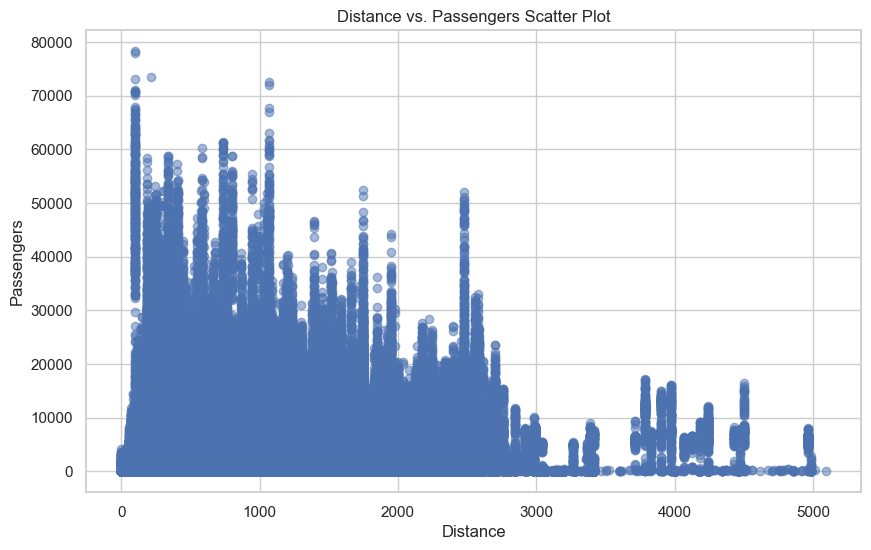

In [19]:
from flight_analysis.PassengersDistance import PassengersDistance  # Assuming your Visualization class is in a separate file

PassVsDist = PassengersDistance()

# Set the DataFrame using the set_data method
PassVsDist.set_data(data_processor)

# Call the passenger_trends method on the instance
PassVsDist.distance_vs_passengers()

- As shown below, ***we can conclude that flights were used the most for upto 1100 miles and there after there is a gradual drop in flights usage over increasing distance. We can also conclude that there is a significant drop after 2700-2800 miles which can be clearly seen in seaborn plot comparatively.***
- ***This conclusion stands on par with the longest line in america by Dr. Cliff Pickover which is 2802 miles as shown in his work.***
- ***2802miles is the longest distance connecting 2 extreme points in USA excluding Alaska and the increasing trend after nearly 3800 miles might be due to the crossing distance over Canada to Alaska.***

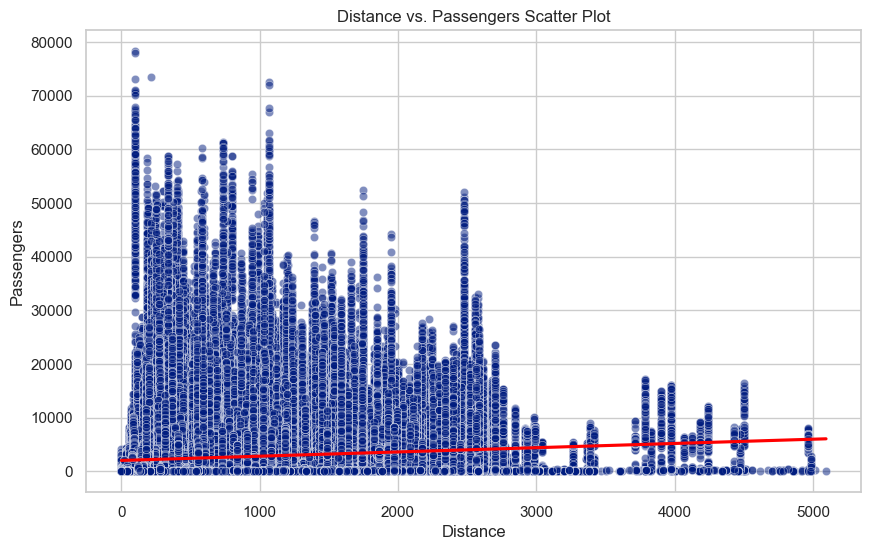

In [20]:
PassVsDist.distance_vs_passengers_seaborn()

In [42]:
from flight_analysis import flight_model
PasssDist = FlightModel(data_processor)

# Call the passenger_trends method on the instance
PasssDist.visualize_predictions()


Model is not trained. Please train the model first.


# Conclusion
***Based on the ananlysis, it is concluded that there is a drastic drop in flight passengers from 2000 to 2002. The main reason for this could be the 9/11 attact that has occured in the year 2001 which affected US commercial airways to a great extent. Highest number of the passengers flew in Texas and California states and the reason behind this could be that those two states are highest populated and vast states in the Unites States after Alaska. Highest travelling occured during the summer vacation, holidays, events and festivals during june, july and august, where as the least because of unfavourable cold weather conditions for tourism during january and february. Flights were used the most for upto 1100 miles and there after there is a gradual drop in flights usage over increasing distance. There is a significant drop after 2700-2800 miles which can be clearly seen in seaborn plot comparatively. This conclusion stands on par with the longest line in america by Dr. Cliff Pickover which is 2802 miles as shown in his work. 2802miles is the longest distance connecting 2 extreme points in USA excluding Alaska and the increasing trend after nearly 3800 miles might be due to the crossing distance over Canada to Alaska. We can conclude that there is an increasing trend in seat occupancy from 1990 to 2009 except during 2001(due to 9/11 attack). On an average, almost all flights took-off by atleast filling 55% of their seats capacity. We can also state that the seat occupancy is highest during summer vacation holidays as derived earlier. The seat occupancy is comparatively higher right after crossing a distance of 2800 miles and flights are taking off with filling atleast 30% of their capacity as the flight has to cross international borders and compensate for an increase in operating costs.***

# References
- Chapter 7 in "Hands-On Data Analysis with Pandas" by Stefanie Molin
- https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html
- https://academictorrents.com/details/a2ccf94bbb4af222bf8e69dad60a68a29f310d9a
- https://github.com/awesomedata/awesome-public-datasets